# Import related functions

In [1]:
import sys
sys.path.append(r'./script/')
import pandas as pd
from ECMpy_function import *

# Input and output files

In [2]:
autopacmen_folder = "./iCW773_get_data/"
reaction_kcat_MW = pd.read_csv('./analysis/reaction_change_by_enzuse_PDH.csv')
reaction_kcat_MW = round(reaction_kcat_MW,3)
reaction_kcat_dis_file='./analysis/reaction_kcat_distrbution.png'
reaction_mw_dis_file='./analysis/reaction_mw_distrbution.png'

# kcat CDF

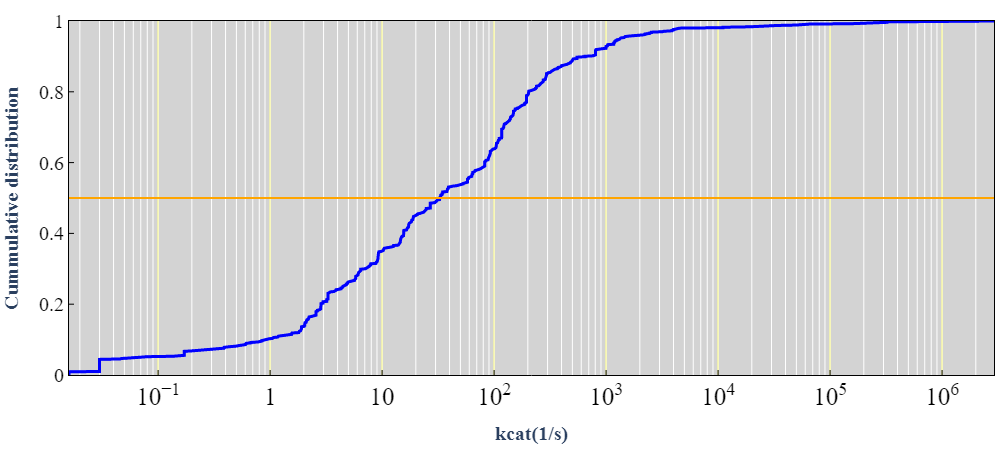

In [4]:
reaction_kcat_select=reaction_kcat_MW.copy()
#Delete the filled data 7398.813
reaction_kcat_select=reaction_kcat_select[reaction_kcat_select['kcat']!=7398.813]
reaction_kcat=reaction_kcat_select['kcat']
#Delete zero value
reaction_kcat = reaction_kcat.dropna(axis=0)
#Sort values
reaction_kcat.sort_values(axis=0, inplace=True)
reaction_kcat = reaction_kcat.reset_index(drop=True)
y_index = reaction_kcat.index / (len(reaction_kcat) - 1)
data_cdf_data = reaction_kcat
x_name="<b>kcat(1/s)<b>"
y_name="<b>Cummulative distribution<b>"
nticks=1000
fig=draw_cdf_fig_kcat(data_cdf_data,reaction_kcat_dis_file,x_name,y_name,y_index,nticks)
fig.show()

# MW CDF

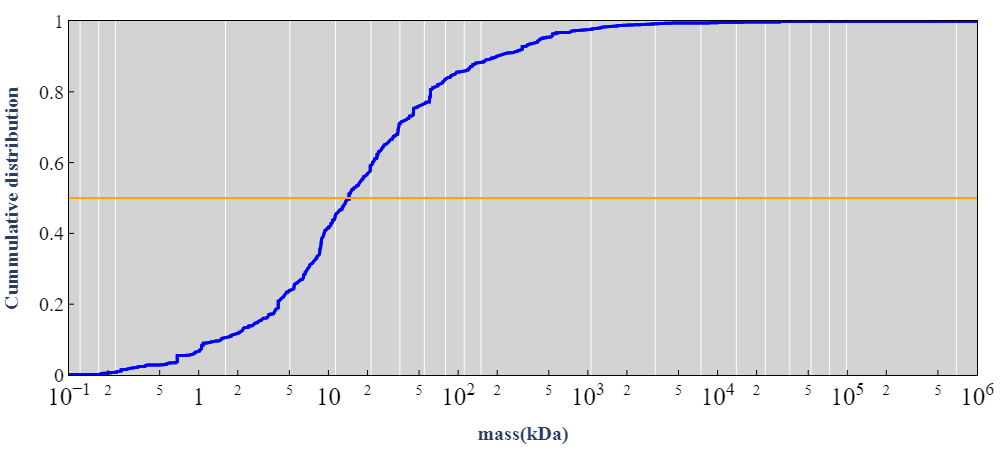

In [5]:
reaction_mw=reaction_kcat_MW['MW']
reaction_mw = reaction_mw.dropna(axis=0)
reaction_mw.sort_values(axis=0, inplace=True)
reaction_mw = reaction_mw.reset_index(drop=True)
y_index = reaction_mw.index / (len(reaction_mw) - 1)
data_cdf_data = reaction_mw/1000# kDa
x_name="<b>mass(kDa)<b>"
y_name="<b>Cummulative distribution<b>"
nticks=10000
fig=draw_cdf_fig_mw(data_cdf_data,reaction_mw_dis_file,x_name,y_name,y_index,nticks)
fig.show()